# TASK #1: UNDERSTAND THE PROBLEM STATEMENT 


- Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.

- Features available are:

    - sex: insurance contractor gender, female, male

    - bmi: Body mass index (ideally 18.5 to 24.9)

    - children: Number of children covered by health insurance / Number of dependents

    - smoker: smoking habits

    - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    - charges: Individual medical costs billed by health insurance


Data Source:https://www.kaggle.com/mirichoi0218/insurance

# TASK #2: IMPORT LIBRARIES AND DATASETS

TYPES OF AVAILABLE SAGEMAKER IMAGES 
- Data Science [datascience-1.0]: Data Science is a Conda image with the most commonly used Python packages and libraries, such as NumPy and SciKit Learn.
- Base Python [python-3.6]
- MXNet (optimized for CPU) [mxnet-1.6-cpu-py36]
- MXNet (optimized for GPU) [mxnet-1.6-gpu-py36]
- PyTorch (optimized for CPU) [pytorch-1.4-cpu-py36]
- PyTorch (optimized for GPU) [pytorch-1.4-gpu-py36]
- TensorFlow (optimized for CPU) [tensorflow-1.15-cpu-py36]
- TensorFlow (optimized for GPU) [tensorflow-1.15-gpu-py36]
- TensorFlow 2 (optimized for CPU) [tensorflow-2.1-cpu-py36]
- TensorFlow 2 (optimized for GPU) [tensorflow-2.1-gpu-py36]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


MINI CHALLENGE
- Read the CSV file "insurance.csv" using pandas 
- Visualize the first and last 5 rows 

In [270]:
# read the csv file 
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS:

<AxesSubplot:>

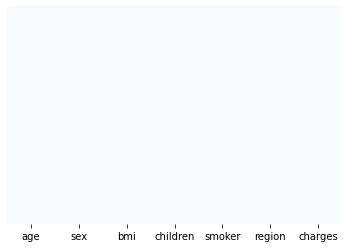

In [7]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [11]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# Check the dataframe info

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


MINI CHALLENGE
- Group data by 'age' and examine the relationship between 'age' and 'charges'


In [14]:
df_age = insurance_df.groupby(by='age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [15]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [271]:
# convert categorical variable to numerical

insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [20]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [272]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [273]:
# Convert categorical variable to numerical 

insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [274]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [275]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [276]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)

# drop_first will actually prevent dummy variable trap, this is where
# two columns are highly correlated with each other and hence dropping one column will make sense.


In [277]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [278]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [279]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [280]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True) 
# need to use inplace to replace the original df in memory
# axis = 1 means its the entire column


In [281]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


MINI CHALLENGE
- Calculate the mean and standard deviation of the age, charges and bmi

In [282]:
insurance_df.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


# TASK #4: VISUALIZE DATASET

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

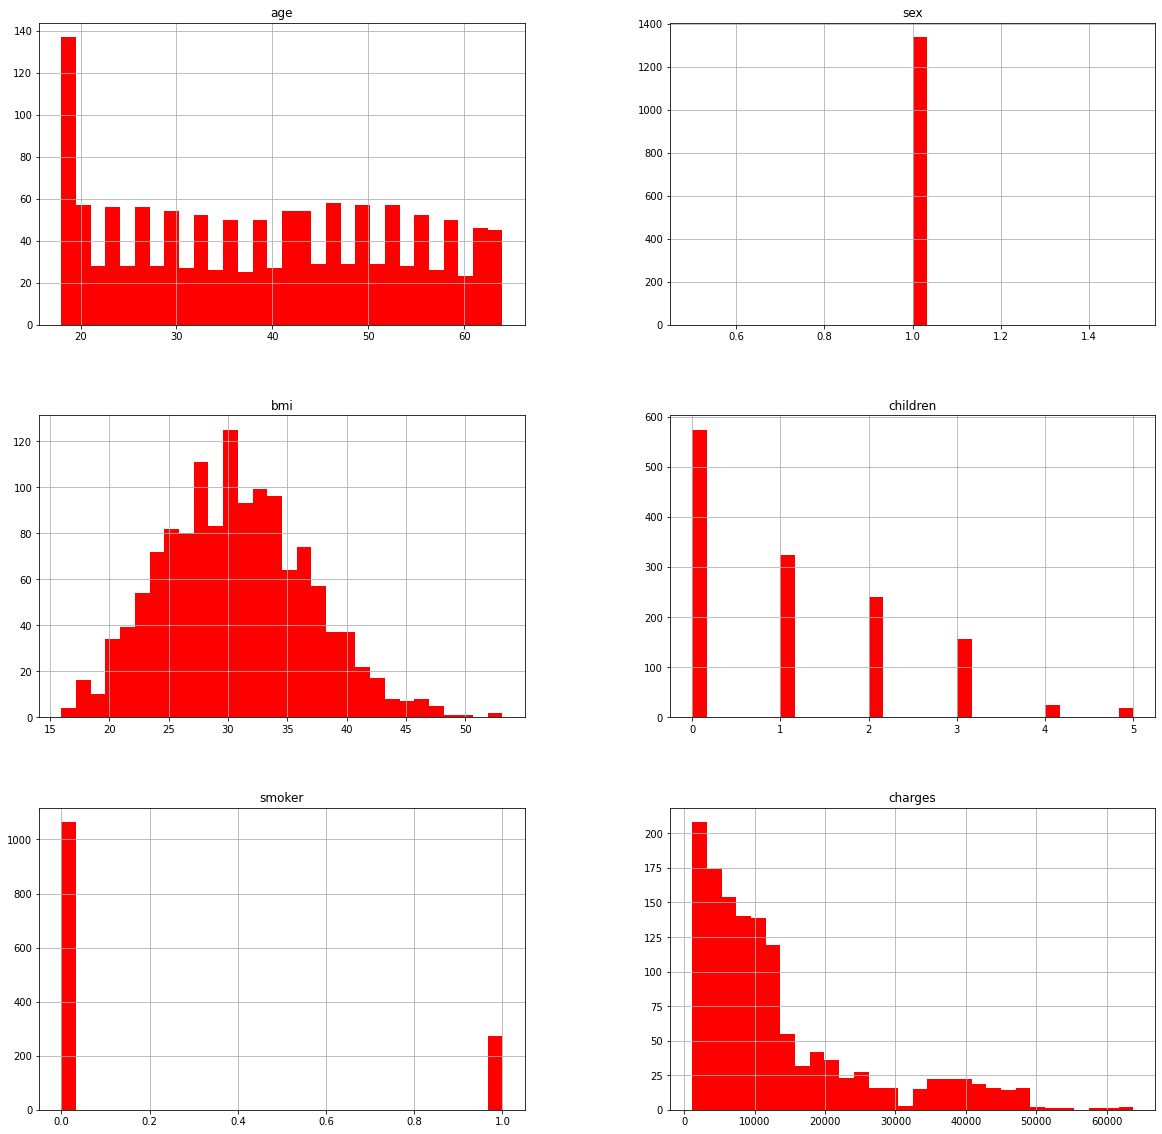

In [38]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (20,20), color = 'r')


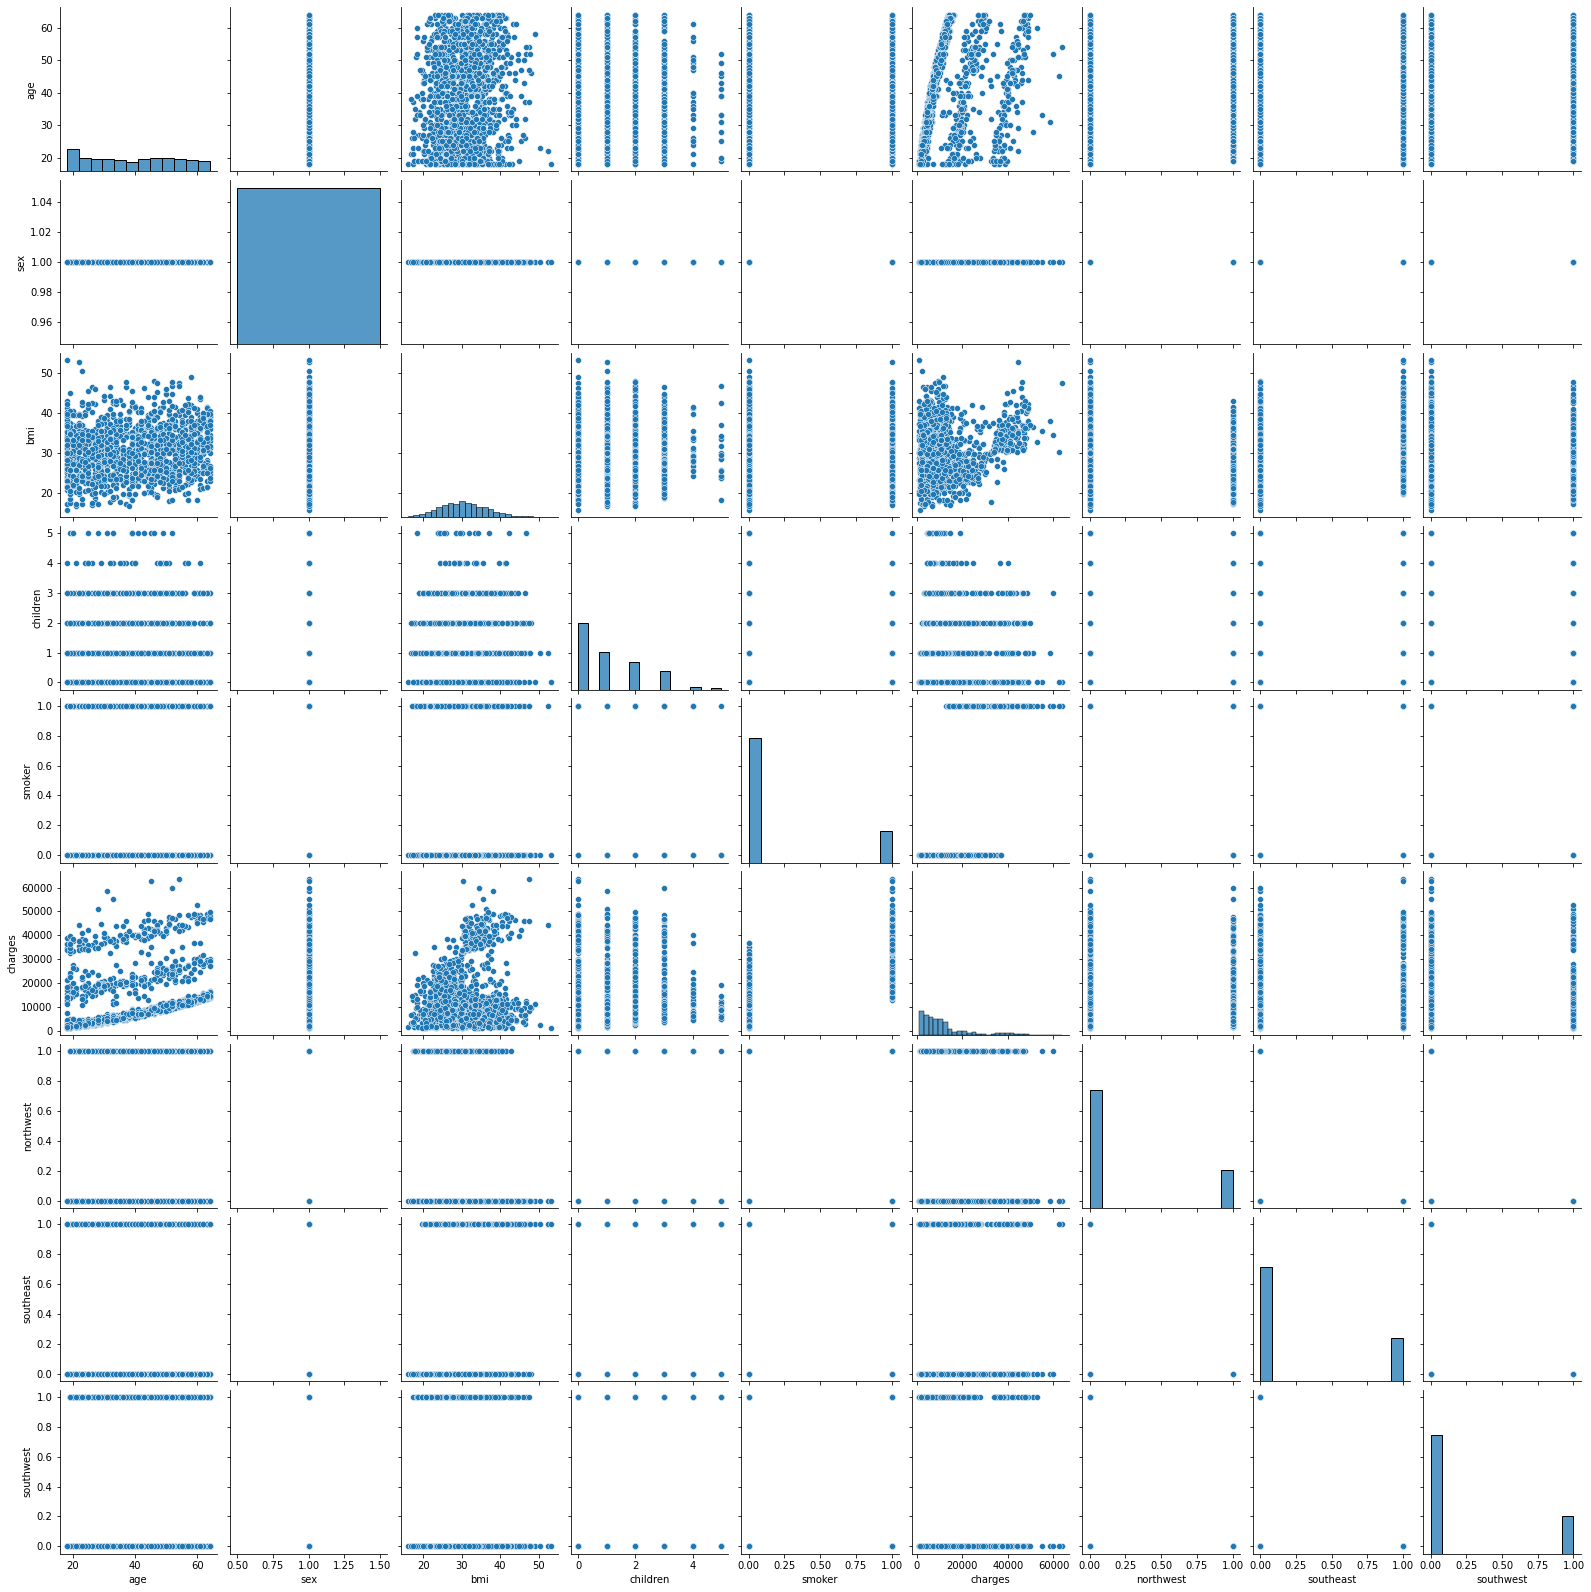

In [39]:
# plot pairplot

sns.pairplot(insurance_df)

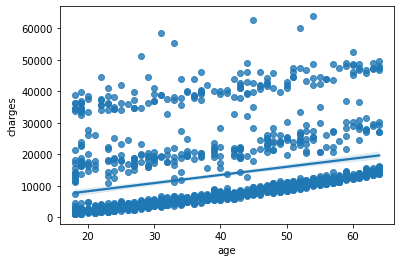

In [283]:
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

MINI CHALLENGE
- Obtain the regplot between bmi and charges


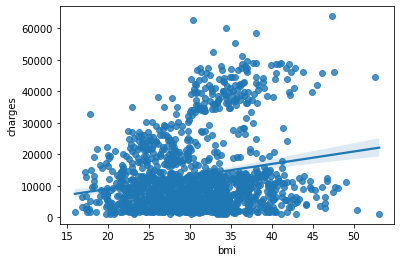

In [41]:
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

MINI CHALLENGE
 - Calculate and plot the correlation matrix
 - Which feature has the most positive correlation with charges?

In [ ]:
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)


<AxesSubplot:>

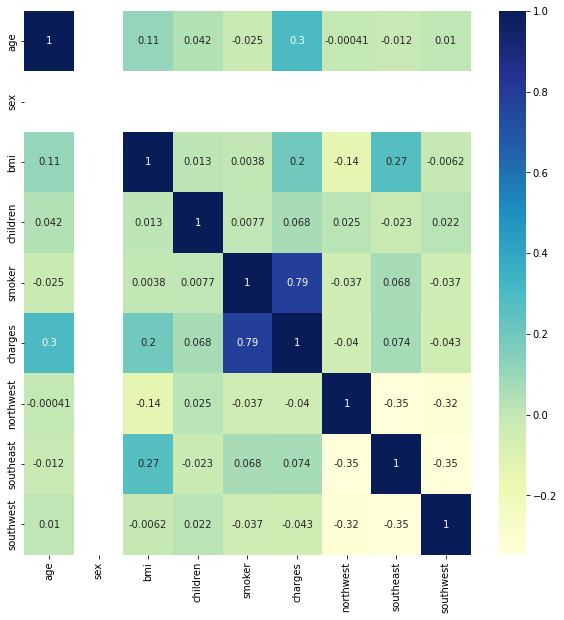

In [51]:
corr = insurance_df.corr()
plt.figure(figsize =(10,10))

sns.heatmap(corr, cmap="YlGnBu", annot=True)


In [52]:
# smoker and age have positive correlations with charges

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [151]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [294]:
X = insurance_df.drop(columns =['charges'])  # do not need the independent vars
y = insurance_df['charges']


In [295]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [296]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [297]:
X.shape

(1338, 8)

In [298]:
y.shape

(1338,)

In [299]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# IMPORTANT TO MAKE IT INTO A FLOAT32 Types

In [300]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [301]:
y = y.reshape(-1,1)  # reformat to a column format

In [302]:
y

array([[16884.924 ],
       [ 1725.5522],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.36  ]], dtype=float32)

In [226]:
# Only take the numerical variables and scale them
X

array([[19.  ,  1.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  1.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  1.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  1.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

# Split data into train, test and call the train_test_split method

In [227]:
y.shape, X.shape

((1338, 1), (1338, 8))

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [303]:

#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

MINI CHALLENGE
- Split the data into 20% Testing and 80% Training
- Double check that the split was successful by getting the shape of both the training and testing datasets

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [231]:
y_train.shape, X_train.shape

((1070, 1), (1070, 8))

# TASK #6: TRAIN AND TEST A LINEAR REGRESSION MODEL IN SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [232]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [233]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7835569989544422

In [234]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [235]:
y_predict_orig = scaler_y.inverse_transform(y_predict)  # need to scale it to inverse transform since it is normalized
y_test_orig = scaler_y.inverse_transform(y_test)


In [236]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [237]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)


MINI CHALLENGE
- calculate the mean absolute error, R2 and adjusted R2

In [238]:
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1-r2) * (n-1) / (n-k-1) 

In [239]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 69641736.0 
MSE = 4849971600000000.0 
MAE = 50242224.0 
R2 = 0.7835569800929482 
Adjusted R2 = 0.7768714814085604


# TASK #7: TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

In [240]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket() 
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

Couldn't call 'get_role' to get Role ARN from role name AmazonSageMaker-ExecutionRole-20211020T234897 to get Role path.
Assuming role was created in SageMaker AWS console, as the name contains `AmazonSageMaker-ExecutionRole`. Defaulting to Role ARN with service-role in path. If this Role ARN is incorrect, please add IAM read permissions to your role or supply the Role Arn directly.


arn:aws:iam::570265874283:role/service-role/AmazonSageMaker-ExecutionRole-20211020T234897


In [241]:
X_train.shape

(1070, 8)

In [242]:
y_train.shape

(1070, 1)

In [243]:
#y_train = y_train[:,0]

In [244]:
y_train.shape

(1070, 1)

In [245]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train.reshape(-1))
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [246]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-ap-southeast-1-570265874283/linear_learner/train/linear-train-data


In [247]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-ap-southeast-1-570265874283/linear_learner/output


In [250]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

# all regression methods in sagemake is names as amazon_estimator

container = get_image_uri(boto3.Session().region_name, 'linear-learner') 

# boto3.Session().region_name automatically gets from our session

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


In [249]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session, 
                                       train_use_spot_instances = True,
                                       train_max_run = 300,
                                       train_max_wait = 600)
                                      )


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 8,  # the number of features you want to train the model
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 100,
                           num_models = 32,  # it will make 32 models and then choose the best one
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2021-10-22 14:37:22 Starting - Starting the training job...
2021-10-22 14:37:45 Starting - Launching requested ML instancesProfilerReport-1634913442: InProgress
...
2021-10-22 14:38:18 Starting - Preparing the instances for training............
2021-10-22 14:40:16 Downloading - Downloading input data...
2021-10-22 14:40:49 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[10/22/2021 14:40:53 INFO 139817024649024] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_b

MINI CHALLENGE
 - retrain the linear learner model using more epochs, more number of models. 
 - Experiment with a different loss function and report any improvement or degradation in results.

# TASK #8: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL 

In [251]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

------!

In [253]:
from sagemaker.predictor import csv_serializer, json_deserializer

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

# linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [254]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [255]:
result # results are in Json format

{'predictions': [{'score': 9078.70703125},
  {'score': 5877.0009765625},
  {'score': 42843.83203125},
  {'score': 9141.1455078125},
  {'score': 31427.08203125},
  {'score': 6366.013671875},
  {'score': 828.30419921875},
  {'score': 13842.43359375},
  {'score': 3351.0126953125},
  {'score': 10158.83203125},
  {'score': 34381.8828125},
  {'score': 7883.138671875},
  {'score': 4573.3037109375},
  {'score': 40545.5},
  {'score': 43134.12890625},
  {'score': 40216.62890625},
  {'score': 11170.79296875},
  {'score': 39711.33203125},
  {'score': 8914.6171875},
  {'score': 37332.2578125},
  {'score': 3816.533203125},
  {'score': 8247.224609375},
  {'score': 1126.94482421875},
  {'score': 3537.1083984375},
  {'score': 10376.7099609375},
  {'score': 11378.474609375},
  {'score': 12255.21484375},
  {'score': 4518.533203125},
  {'score': 9715.064453125},
  {'score': 1404.66162109375},
  {'score': 7851.0517578125},
  {'score': 11529.740234375},
  {'score': 2561.94921875},
  {'score': 4488.638671875

In [256]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [257]:
predictions

array([ 9078.70703125,  5877.00097656, 42843.83203125,  9141.14550781,
       31427.08203125,  6366.01367188,   828.30419922, 13842.43359375,
        3351.01269531, 10158.83203125, 34381.8828125 ,  7883.13867188,
        4573.30371094, 40545.5       , 43134.12890625, 40216.62890625,
       11170.79296875, 39711.33203125,  8914.6171875 , 37332.2578125 ,
        3816.53320312,  8247.22460938,  1126.94482422,  3537.10839844,
       10376.70996094, 11378.47460938, 12255.21484375,  4518.53320312,
        9715.06445312,  1404.66162109,  7851.05175781, 11529.74023438,
        2561.94921875,  4488.63867188,  3257.49414062,  9573.59667969,
        1663.66845703,  7711.42578125, 39803.5390625 , 36712.48046875,
        2609.37011719,  2631.27148438, 11584.77539062, 11556.86523438,
        6429.52246094, 11723.02539062,  2871.76660156,  3198.53613281,
       39259.16796875,  6111.07714844, 13696.93945312,  1669.08203125,
        8143.02539062,  1417.41162109, 11713.49804688, 10933.3515625 ,
      

In [258]:
predictions.shape

(268,)

In [259]:
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig = scaler_y.inverse_transform(y_test)

In [260]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 76345931.699 
MSE = 5828701287010245.0 
MAE = 39640657.18235535 
R2 = 0.7398785152526208 
Adjusted R2 = 0.7318438747971033


In [261]:
# Delete the end-point

linear_regressor.delete_endpoint()

# TASK #9: LET'S TRY A MORE COMPLEX ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [263]:
!pip install tensorflow

     |████████████████████████████████| 458.3 MB 6.4 kB/s             
     |████████████████████████████████| 462 kB 47.1 MB/s            
     |████████████████████████████████| 1.3 MB 41.0 MB/s            
     |████████████████████████████████| 14.8 MB 58.4 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 5.8 MB 33.5 MB/s            
     |████████████████████████████████| 4.0 MB 48.0 MB/s            
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=90d21a112931a4717ed786d400730e3c3af4fcffaea5c3fbb230cb9e442f7ce8
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
Successfully built clang
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Unin

In [304]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization  
from tensorflow.keras.optimizers import Adam 

# Dense is fuklly connected ANN which every neuron is fully connected to its subsequent layer
# dropout prevents over-fitting, this drops random neurons and prevents co dependency of neurons 

In [314]:
# optimizer = Adam()
ANN_model = keras.Sequential() # adding layers from left to right
ANN_model.add(Dense(500, input_dim = 8)) # add a Dense layer with 50 neurons with 8 inputs
ANN_model.add(Activation('relu')) # activation function is relu
ANN_model.add(Dense(1500)) # Another 150 neurons
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.25)) # randomly drop 25% of the neurons
ANN_model.add(Dense(1500))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(500))
ANN_model.add(Activation('linear')) # problem is linear so we use activation as linear
ANN_model.add(Dense(1)) # 1 final neuron at the end of the network
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 500)               4500      
_________________________________________________________________
activation_20 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1500)              751500    
_________________________________________________________________
activation_21 (Activation)   (None, 1500)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 1500)              2251500   
_________________________________________________________________
activation_22 (Activation)   (None, 1500)             

In [315]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 2s 36ms/step - loss: 0.3986 - val_loss: 0.1908
Epoch 2/100
43/43 [==============================] - 1s 34ms/step - loss: 0.2231 - val_loss: 0.1711
Epoch 3/100
43/43 [==============================] - 1s 34ms/step - loss: 0.2054 - val_loss: 0.2047
Epoch 4/100
43/43 [==============================] - 1s 34ms/step - loss: 0.2243 - val_loss: 0.1579
Epoch 5/100
43/43 [==============================] - 2s 35ms/step - loss: 0.2204 - val_loss: 0.1739
Epoch 6/100
43/43 [==============================] - 1s 34ms/step - loss: 0.2038 - val_loss: 0.1679
Epoch 7/100
43/43 [==============================] - 1s 34ms/step - loss: 0.2006 - val_loss: 0.1583
Epoch 8/100
43/43 [==============================] - 1s 34ms/step - loss: 0.1978 - val_loss: 0.1880
Epoch 9/100
43/43 [==============================] - 1s 34ms/step - loss: 0.2299 - val_loss: 0.1625
Epoch 10/100
43/43 [==============================] - 1s 34ms/step - loss: 0.2026 - val_loss: 0.1618

In [316]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 6ms/step - loss: 0.1811
Accuracy : 0.8189426362514496


In [317]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

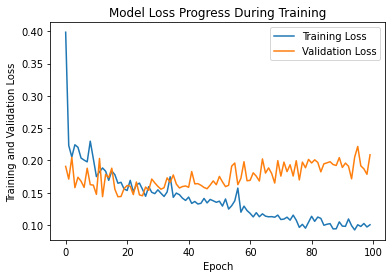

In [318]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

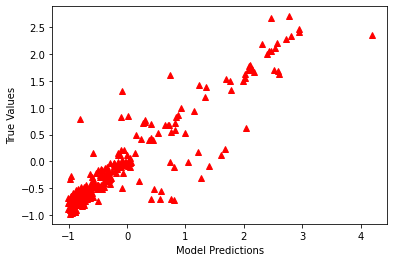

In [319]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [320]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

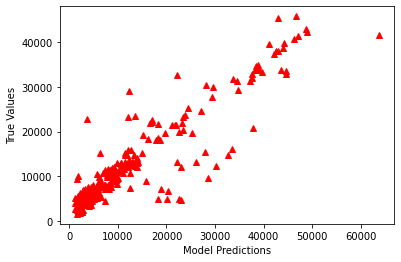

In [321]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [323]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5112.012 
MSE = 26132668.0 
MAE = 3068.9302 
R2 = 0.8316722739912714 
Adjusted R2 = 0.8264729619910018


MINI CHALLENGE
- Experiment with a deeper network with more neurons in the hidden layer
- Experiment with no regularization (dropout)

# EXCELLENT JOB!